# Exercise 2

In this exercise we will apply the PCA algorithm to the faces of some famous people. As discussed earlier, this is a real world example of how PCA is being used to reduce dimensionality of images where data size is significantly reduced so it is easier to train machine learning algorithms while maintaining the most important features of the image data. Let's download, load and visualize a sample of the images:

In [26]:
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
lfw_people = fetch_lfw_people(min_faces_per_person=60)

In [6]:
# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
faces = lfw_people.data
n_features = faces.shape[1]

# the label to predict is the id of the person
labels = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Total dataset size:
n_samples: 1348
n_features: 2914
n_classes: 8


Text(0,0.5,'Face Data')

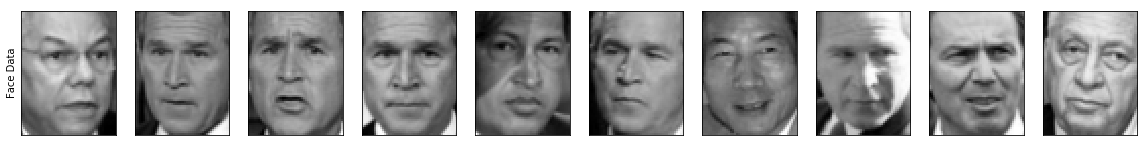

In [23]:
# Plot the results
fig, ax = plt.subplots(1, 10, figsize=(20, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]})
for i in range(10):
    ax[i].imshow(faces[i].reshape(62, 47), cmap='binary_r')
    
ax[0].set_ylabel('Face Data')

We can see that the images are 62 by 47 pixels and when we flatten the images on a single dimension, that means we end up with 2914 features - as each pixel becomes a feature. We have 1348 images that we will use to train for 8 different people. Now let's fit our PCA model to reduce the dimensionality of the images to 200. 

In [28]:
# #############################################################################
# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction
n_components = 200


print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, faces.shape[0]))
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X)



Extracting the top 200 eigenfaces from 1348 faces
Projecting the input data on the eigenfaces orthonormal basis


We can now plot the explained variance ratio by the number of components. This is an important indication of how many dimensions we should reduce our data to. A good rule of thumb is to reduce the data when we reach the plateau of the diminishing returns. In our case, we could also have fit our model with around 100 components which would have captured 90% of the variance in the data. 

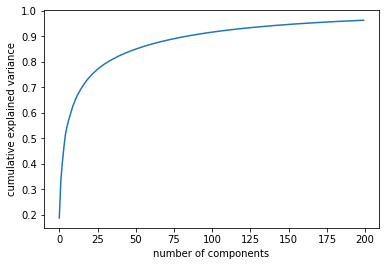

In [29]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [30]:
print("Projecting the input data on the eigenfaces orthonormal basis")
faces_pca = pca.transform(faces)
projected = pca.inverse_transform(faces_pca)

Projecting the input data on the eigenfaces orthonormal basis


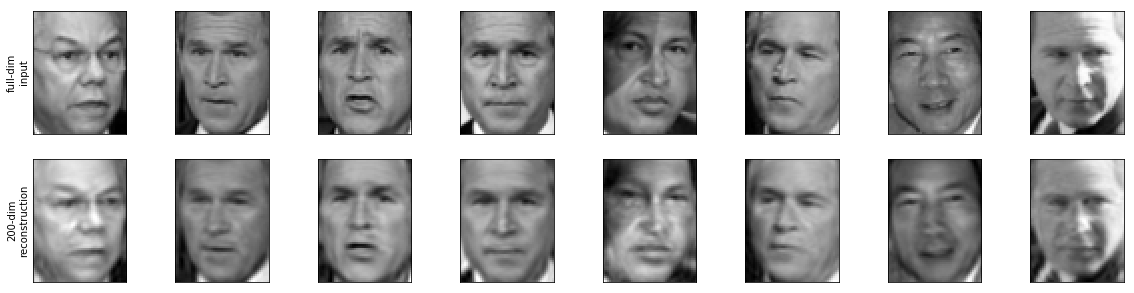

In [36]:
# Plot the results
fig, ax = plt.subplots(2, 8, figsize=(20, 5),
                       subplot_kw={'xticks':[], 'yticks':[]})
for i in range(8):
    ax[0, i].imshow(faces[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('200-dim\nreconstruction');

We can see that the transformed images have less details and seem to be more blurry, but most important features are still apparent and we can certainly identify who the person is while reducing the data by a factor of 10. The next step would be to train the data to classify images according to the identity labels.  

# Activity

In this exercise we will load the Iris dataset which consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. 

Then the aim will be to:
1a) Fit the PCA algorithm with 3 components and visualize the explained variance ratio by number of components. Therefore we should have the explained variance ratio on one axis, and the number of components on the second axis. 
1b) Fir the PCA algorithm with 2 components and visualize the data on a two dimensional space. 

In [72]:
iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names


Inspection of  data:

In [48]:
X.shape

(150, 3)

In [70]:
X[0:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [76]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

1a. Fit the PCA algorithm with 3 components and visualize the explained variance ratio by number of components. 

In [62]:
pca = PCA(n_components=3)
X_pca = pca.fit(X).transform(X)

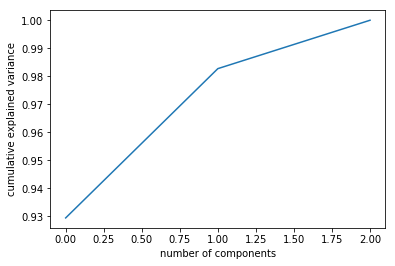

In [63]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

1b) Fir the PCA algorithm with 2 components and visualize the data on a two dimensional space. 

In [64]:
pca = PCA(n_components=2)
X_pca = pca.fit(X).transform(X)

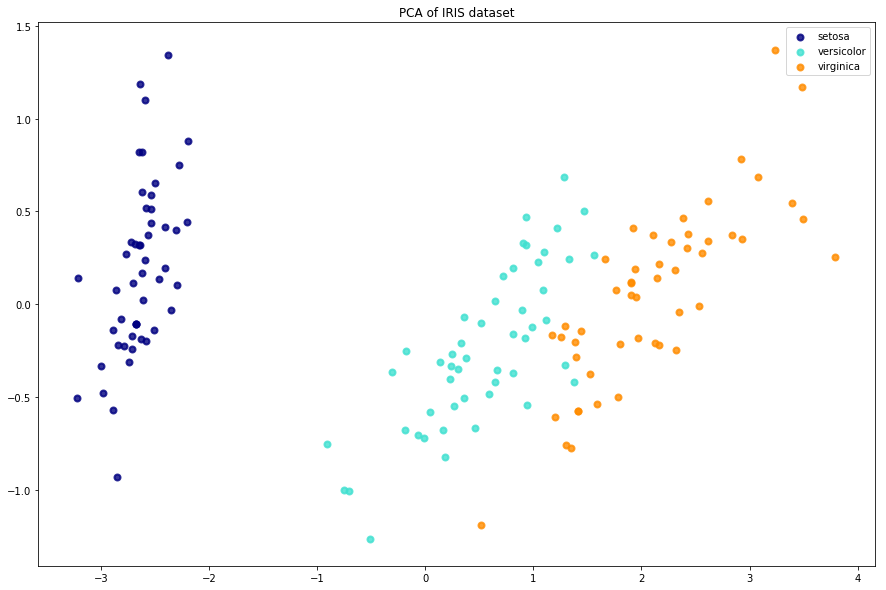

In [69]:
plt.figure(figsize=(15, 10))
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')
plt.show()



At the end of the activity we can clearly see where each type of flower is grouped together on a two dimensional space.  